# ÁÆóÊ≥ïÂª∫Ê®°

## ÂàÜÁ±ªÂô®ËÑâÁªú

ÂàÜÁ±ªÂô®ÁöÑÂ§ßËá¥ËÑâÁªúÂ¶Ç‰∏ãÔºö<br>
<img src=figtabs/ch5/clf.png align=center width=65% height=65% />

Âä†ËΩΩÂåÖÂπ∂ËøõË°åÁéØÂ¢ÉËÆæÁΩÆÔºö

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [88]:
from sklearn.decomposition import PCA

In [89]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [90]:
import itertools
from itertools import cycle

In [91]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.utils import check_Xy, format_kwarg_dictionaries

In [92]:
from math import floor
from math import ceil

In [93]:
import pickle

In [94]:
plt.style.use('classic')
plt.rcParams['font.sans-serif'] = ['FangSong']  # Âà∂ÂÆöÈªòËÆ§Â≠ó‰Ωì
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫‰∏∫ÊñπÂùóÁöÑÈóÆÈ¢ò
%matplotlib inline

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [96]:
rng = np.random.RandomState(2012)

ÈáçÊñ∞ËΩΩÂÖ•ÂâçËø∞Êï∞ÊçÆÔºö

In [97]:
with open('pickle/ch5_data.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
X_numeric = objects_awaken['X_numeric']
y_numeric = objects_awaken['y_numeric']

In [98]:
X_numeric

yw  sx  wy  zz   ls  dl  wl  hx  sw  xb_nan  xb_nv
0    94  82  96  97   97  98  95  94  88       0      1
1    87  94  89  95   94  94  90  90  89       1      0
2    92  79  86  98   95  96  89  94  87       1      0
3    91  84  96  93   97  94  82  90  83       0      1
4    85  92  82  93   87  88  95  94  93       1      0
..   ..  ..  ..  ..  ...  ..  ..  ..  ..     ...    ...
770  79  78  70  83   86  86  76  78  70       1      0
771  87  63  55  93  100  94  43  88  82       1      0
772  85  59  89  80   85  82  61  64  75       1      0
773  81  62  76  89   76  91  49  68  74       1      0
774  72  59  82  92   85  82  59  58  55       1      0

[773 rows x 11 columns]

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_numeric,
                                                    test_size=0.3, random_state=rng)

Êï∞ÊçÆÈõÜÂàíÂàÜ‰∏∫ËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆÈõÜÔºåË¶ÅÂ∞ΩÈáè‰øùÁïôÊúâ‰ª∑ÂÄºÁöÑ‰ø°ÊÅØÔºåËøô‰∫õ‰ø°ÊÅØÂ∞ÜÊúâÂà©‰∫éËÆ≠ÁªÉÊú∫Âô®Â≠¶‰π†ÁÆóÊ≥ï„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨‰∏ÄËà¨‰∏ç‰ºö‰∏∫ÊµãËØïÊï∞ÊçÆÈõÜÂàÜÈÖçÂ§™Â§öÁöÑÊï∞ÊçÆ„ÄÇ‰∏çËøáÔºåÊµãËØïÈõÜË∂äÂ∞èÔºåÂØπÊ≥õÂåñËØØÂ∑ÆÁöÑ‰º∞ËÆ°Â∞Ü‰ºöË∂ä‰∏çÂáÜÁ°Æ„ÄÇÂú®ÂØπÊï∞ÊçÆÈõÜËøõË°åÂàíÂàÜÊó∂ÔºåÈúÄË¶ÅÂØπÊ≠§ËøõË°åÊùÉË°°„ÄÇÂú®ÂÆûÈôÖÂ∫îÁî®‰∏≠ÔºåÂü∫‰∫éÂéüÂßãÊï∞ÊçÆÁöÑÂ§ßÂ∞èÔºåÂ∏∏Áî®ÁöÑÂàíÂàÜÊØî‰æãÊòØ60:40„ÄÅ70:30ÔºåÊàñËÄÖ80:20„ÄÇÂØπ‰∫éÈùûÂ∏∏Â∫ûÂ§ßÁöÑÊï∞ÊçÆÈõÜÔºåÂ∞ÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÊØî‰æãÊåâÁÖß90:10ÊàñËÄÖ99:1ËøõË°åÂàíÂàÜ‰πüÊòØÂ∏∏ËßÅ‰∏îÂèØ‰ª•Êé•ÂèóÁöÑ„ÄÇ

In [100]:
X_train.shape

(541, 11)

In [101]:
X_train.head()

yw  sx  wy  zz  ls   dl  wl   hx   sw  xb_nan  xb_nv
444  89  93  97  96  92  100  95  100  100       0      1
257  89  79  71  94  91   98  85   82   84       1      0
300  92  87  92  97  92   98  89  100   86       0      1
16   89  71  90  95  91   96  84   88   80       0      1
554  85  96  85  93  90   92  97   94   90       1      0

In [102]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [103]:
iris_X = iris['data']
iris_X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [104]:
np.random.permutation(iris_X)[:5]

array([[4.4, 3. , 1.3, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 2.8, 5.6, 2.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.4, 3.2, 4.5, 1.5]])

## ÁâπÂæÅÊ†áÂáÜÂåñ

ÁâπÂæÅÁº©ÊîæÔºàfeature scalingÔºâÊòØÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜËøáÁ®ã‰∏≠Ëá≥ÂÖ≥ÈáçË¶ÅÁöÑ‰∏ÄÊ≠•Ôºå‰ΩÜÂç¥ÊûÅÊòìË¢´‰∫∫‰ª¨ÂøΩÁï•„ÄÇÂÜ≥Á≠ñÊ†ëÂíåÈöèÊú∫Ê£ÆÊûóÊòØÊú∫Âô®Â≠¶‰π†ÁÆóÊ≥ï‰∏≠‰∏∫Êï∞‰∏çÂ§öÁöÑ‰∏çÈúÄË¶ÅËøõË°åÁâπÂæÅÁº©ÊîæÁöÑÁÆóÊ≥ï„ÄÇÁÑ∂ËÄåÔºåÂØπÂ§ßÂ§öÊï∞Êú∫Âô®Â≠¶‰π†Âíå‰ºòÂåñÁÆóÊ≥ïËÄåË®ÄÔºåÂ∞ÜÁâπÂæÅÁöÑÂÄºÁº©ÊîæÂà∞Áõ∏ÂêåÁöÑÂå∫Èó¥ÂèØ‰ª•‰ΩøÂÖ∂ÊÄßËÉΩÊõ¥‰Ω≥„ÄÇ   

$x_i^{std} = \frac{{{x_i} - \max \left( x \right)}}{{\max \left( x \right) - \min \left( x \right)}}$

Êàë‰ª¨Áî®‰∏ãËæπÁöÑËØ≠Ë®ÄÊù•ÊèèËø∞ÔºåÁõ∏‰ø°ÂêåÂ≠¶‰ª¨ÂÆπÊòìÁúãÂæóÊáÇÔºåÂ∞§ÂÖ∂ÊòØÊúâ‰∫ÜÂêëÈáèÂåñËøêÁÆóÁöÑÂü∫Á°Ä‰πãÂêéÔºö<br>
$X = \frac{{X - \max \left( X \right)}}{{\max \left( X \right) - \min \left( X \right)}}$

Áî®PythonËØ≠Ë®ÄÊù•ÊèèËø∞ÁöÑËØùÔºå‰∏éÊï∞Â≠¶ËØ≠Ë®ÄÂÆåÂÖ®‰∏ÄÊ†∑‚Äî‚ÄîÂÅáÂÆö$X$ÊòØ‰∏Ä‰∏™ÂêëÈáèÔºö<br>
$X = \frac{{X - \max \left( X \right)}}{{\max \left( X \right) - \min \left( X \right)}}$<br>
ÂΩìÁÑ∂ÔºåÂÖ∑‰Ωì‰ª£Á†ÅÔºåÁ®çÊúâÂå∫Âà´Ôºö<br>
$(X - min(X)) / (np.max(X) - np.min(X))$

Êàë‰ª¨‰∏ç‰∏ªÂº†ÈáçÂ§çÈÄ†ËΩÆÂ≠êÔºåÂú®Â∑•‰∏öÁ∫ß/ÂïÜ‰∏öÁ∫ßÂÆûË∑µ‰∏≠ÔºåÁõ¥Êé•Áî®sklearnÂ∞±Â•ΩÔºö

In [105]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

‰πüÂèØ‰ª•ÈááÁî®Â¶Ç‰∏ãÊ†áÂáÜÂåñÁöÑÊñπÊ≥ïÔºö  

$x_i^{std} = \frac{{{x_i} - \mu }}{\sigma }$

ÊîπÁî®PythonÊù•ÊèèËø∞ÁöÑËØùÔºö<br>
$X = \frac{{X - np.\min \left( X \right)}}{{np.\max \left( X \right) - np.\min \left( X \right)}}$

ÂΩìÁÑ∂ÔºåÂú®sklearn‰∏≠‰πüÊó©ÊúâÊ†áÂáÜÁöÑÂÆûÁé∞Ôºö

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ÂΩìÁÑ∂ÔºåËá™Â∑±ÂÜô‰ª£Á†ÅÂÆûÁé∞‰∏Ä‰∏ãÔºåÂÖ∂ÂÆû‰πü‰∏çÂ§çÊùÇÔºö

In [107]:
X_train_std = X_train.copy()
X_train_std.iloc[:, 0] = (X_train.iloc[:, 0] - X_train.iloc[:, 0].mean()) / X_train.iloc[:, 0].std()

Âú®‰∏äÈù¢ÁöÑ‰ª£Á†Å‰∏≠Ôºå‰ªépreprocessingÊ®°Âùó‰∏≠Âä†ËΩΩ‰∫ÜStandardScalerÁ±ªÔºåÂπ∂ÂÆû‰æãÂåñ‰∫Ü‰∏Ä‰∏™StandardScalerÂØπË±°ÔºåÁî®ÂèòÈáèsc‰Ωú‰∏∫ÂØπÂÆÉÁöÑÂºïÁî®„ÄÇ‰ΩøÁî®StandardScaler‰∏≠ÁöÑfitÊñπÊ≥ïÔºåÂèØ‰ª•ËÆ°ÁÆóËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠ÊØè‰∏™ÁâπÂæÅÁöÑ$\mu $ÔºàÊ†∑Êú¨ÂùáÂÄºÔºâÂíå$\sigma$ÔºàÊ†áÂáÜÂ∑ÆÔºâ„ÄÇÈÄöËøáË∞ÉÁî®transformÊñπÊ≥ïÔºåÂèØ‰ª•‰ΩøÁî®ÂâçÈù¢ËÆ°ÁÆóÂæóÂà∞ÁöÑ$\mu $Âíå$\sigma$Êù•ÂØπËÆ≠ÁªÉÊï∞ÊçÆÂÅöÊ†áÂáÜÂåñÂ§ÑÁêÜ„ÄÇ

## Ê®°ÂûãËØÑ‰º∞

In [108]:
from sklearn.metrics import accuracy_score
def print_performance(real, pred):
    print('ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: {}'.format((real != pred).sum()))
    print('ÂáÜÁ°ÆÁéá(accuracy): {:.2f}%'.format(accuracy_score(real, pred)*100))

In [109]:
#def accuracy_score(truth, pred):
#    if len(truth) == len(pred): 
#        return "Predictions have an accuracy of {:.2f}.".format((truth == pred).mean()*100)
#    else:
#        return "Number of predictions does not match number of outcomes!"

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

## ËøëÈÇªÊ≥ï

‰ªéËøáÁ®ãÊù•ËÆ≤ÔºåÂ≠¶‰π†ÂèØ‰ª•ÂàÜ‰∏∫‰∏§ÁßçÔºö<br>
* ÊÄ•ÂàáÂ≠¶‰π†Ê≥ïEager LearnerÔºöÂú®Êé•Êî∂ÂæÖÂàÜÁ±ªÁöÑÊñ∞ÂÖÉÁªÑ‰πãÂâçÂ∞±ÊûÑÈÄ†Ê≥õÂåñÊ®°Âûã„ÄÇÂÜ≥Á≠ñÊ†ëÂΩíÁ∫≥„ÄÅË¥ùÂè∂ÊñØÂàÜÁ±ª„ÄÅÂü∫‰∫éËßÑÂàôÁöÑÂàÜÁ±ªÁ≠âÈÉΩÂ±û‰∫éÊÄ•ÂàáÂ≠¶‰π†Ê≥ï
* ÊÉ∞ÊÄßÂ≠¶‰π†Ê≥ïLazy LearnerÔºöÂΩìÁªôÂÆö‰∏Ä‰∏™ËÆ≠ÁªÉÂÖÉÁªÑÊó∂ÔºåÁÆÄÂçïÂú∞Â≠òÂÇ®ÂÆÉÔºàÊàñÁ®çÂä†Â§ÑÁêÜÔºâÔºåÂπ∂‰∏î‰∏ÄÁõ¥Á≠âÂæÖÔºåÁõ¥Âà∞ÁªôÂÆö‰∏Ä‰∏™Ê£ÄÈ™åÂÖÉÁªÑ„ÄÇ‰ªÖÂΩìÁúãÂà∞Ê£ÄÈ™åÂÖÉÁªÑÊó∂ÔºåÊâçËøõË°åÊ≥õÂåñÔºå‰ª•‰æøÊ†πÊçÆ‰∏éÂ≠òÂÇ®ÂÖÉÁªÑÁöÑÁõ∏‰ººÊÄßÂØπËØ•ÂÖÉÁªÑËøõË°åÂàÜÁ±ª„ÄÇÊÉ∞ÊÄßÂ≠¶‰π†Âú®Êèê‰æõËÆ≠ÁªÉÂÖÉÁªÑÊó∂Âè™ÂÅöÂ∞ëÈáèÂ∑•‰ΩúÔºåÂú®ÂàÜÁ±ªÊàñÊï∞ÂÄºÈ¢ÑÊµãÊó∂ÂÅöÊõ¥Â§öÂ∑•‰Ωú„ÄÇ<br>

ËøëÈÇªÊ≥ïÂ±û‰∫éÊÉ∞ÊÄßÂ≠¶‰π†ÂèëÊ≥ïÔºåÂÖ∂ÂéüÁêÜÈùûÂ∏∏ÁÆÄÂçïÁõ¥ËßÇÔºöÊãøÂà∞‰∏Ä‰∏™ÊµãËØïÊ†∑Êú¨Êó∂ÔºåÂú®Êï∞ÊçÆÁ©∫Èó¥ÈáåÁéØÈ°æÂõõÂë®ÔºåÁúãÁúãË∫´ËæπÁöÑ$k$Â∞è‰ºô‰º¥Â§¥‰∏äÂ§ßÂ§öË¥¥ÁöÑ‰ªÄ‰πàÊ†áÁ≠æÔºåÁÑ∂ÂêéÊääËá™Â∑±‰πüË¥¥‰∏äÁõ∏ÂêåÁöÑÊ†áÁ≠æ„ÄÇ

ËæìÂÖ•ÔºöÊúÄËøëÈÇªÊï∞ÁõÆ$k$ÔºåËÆ≠ÁªÉÈõÜ$S$ÔºåÊµãËØïÈõÜ$T$  
ËæìÂá∫ÔºöÂØπÊµãËØïÈõÜ$T$‰∏≠ÊâÄÊúâÊµãËØïÊ†∑Êú¨È¢ÑÊµãÂÖ∂Á±ªÊ†áÂè∑ÂÄº  
1. for ÊØè‰∏™ÊµãËØïÊ†∑Êú¨$z = \left( {{X^*},{y^*}} \right) \in T$   
2. &emsp;&emsp;ËÆ°ÁÆó$ùëß$ÂíåÊØè‰∏™ËÆ≠ÁªÉÊ†∑Êú¨$\left( {X,y} \right) \in S$‰πãÈó¥ÁöÑË∑ùÁ¶ª$d\left( {X,{X^*}} \right)$  
3. &emsp;&emsp;ÈÄâÊã©Á¶ª$ùëß$ÊúÄËøëÁöÑ$k$ÊúÄËøëÈÇªÈõÜÂêà${S_z} \subseteq S$
4. &emsp;&emsp;Â§öÊï∞Ë°®ÂÜ≥${y^*} = \mathop {\arg \max }\limits_v \sum\nolimits_{\left( {{X_i},{y_i}} \right) \in {D_Z}} {I\left( {v = {y_i}} \right)}$     
5. end for

In [111]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 65
ÂáÜÁ°ÆÁéá(accuracy): 71.98%


In [112]:
clf =  KNeighborsClassifier(n_neighbors=7, 
                            p=2,
                            metric='minkowski')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 59
ÂáÜÁ°ÆÁéá(accuracy): 74.57%


## ÂÜ≥Á≠ñÊ†ë

ÂÜ≥Á≠ñÊ†ëÊòØ‰∏Ä‰∏™ÂÄíÁùÄÁîüÈïøÁöÑÊ†ëÔºö<br>
![img](figtabs/ch5/cart.png)

ÂÜ≥Á≠ñÊ†ëÁöÑÁîüÈïøÔºöÈÄíÂΩíÂàíÂàÜ„ÄÅ‰∏çÊñ≠ÁîüÈïøÔºõÂ±ÄÈÉ®ÊúÄ‰ºò„ÄÅÊ≠•Ê≠•‰∏∫Ëµ¢<br>
Â¶ÇÊûúÊï∞ÊçÆÊó†ÈúÄÂÜçÂàÜÔºàÂ¶ÇÂΩìÂâçÊï∞ÊçÆËÆ∞ÂΩïÁ±ªÊ†áÁ≠æÂêå‰∏∫‰∏ÄÁ±ªÔºâ„ÄÅÊàñÊòØÊó†Ê≥ïÂÜçÂàÜÔºàÂ¶ÇÊâÄÊúâËÆ∞ÂΩïÁöÑÂ±ûÊÄßÂÄºÁõ∏Âêå„ÄÅÊàñÊòØÊï∞ÊçÆËÆ∞ÂΩïÊï∞Â§™Â∞ëÔºâÔºåÂàôÂª∫Á´ãÂè∂Â≠êÁªìÁÇπÔºåÂπ∂ÊåâÁÖßÂ∞ëÊï∞Êúç‰ªéÂ§öÊï∞ÔºàÊúâÁîü‰∫éÊó†ÔºâÁöÑÂéüÂàôÔºåÁªôÂè∂Â≠êÁªìÁÇπÊâì‰∏äÊ†áÁ≠æÔºõÂê¶ÂàôÔºåÂØªÊâæ‰∏Ä‰∏™Â±ûÊÄßÔºåÊ†πÊçÆËØ•Â±ûÊÄßÁöÑ‰∏çÂêåÂèñÂÄºÊÉÖÂÜµÔºåÊääÊï∞ÊçÆÂàÜÊàêÁ∫ØÂ∫¶ËæÉÂ§ßÁöÑ‰∏§‰∏™ÔºàÊàñÂá†‰∏™ÔºâÂ≠êÈõÜ„ÄÇÂØπ‰∫éËøô‰∫õÂ≠êÈõÜÔºåÈÄíÂΩíÊâßË°å‰ª•‰∏äÊìç‰ΩúÔºåÂºÄÊûùÊï£Âè∂„ÄÇ<br>
<img src=figtabs/ch5/cart_a.png align=left width = 40% height = 40% />

ÂÜ≥Á≠ñÊ†ëÁöÑÂéüÁêÜÂ§ßËá¥ÈÉΩÂ∑Æ‰∏çÂ§öÔºå‰∏çÂêåÁÇπÂú®‰∫é‰∏çÂêåÁÆóÊ≥ï‰∏çÁ∫ØÂ∫¶ÁöÑÂ∫¶ÈáèÔºö<br>
![img](figtabs/ch5/cart_impurity.png)

In [113]:
clf = DecisionTreeClassifier(criterion='gini', 
                             max_depth=4, 
                             random_state=2012)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 68
ÂáÜÁ°ÆÁéá(accuracy): 70.69%


[Text(167.4, 200.88, 'X[7] <= 95.0\ngini = 0.5\nsamples = 541\nvalue = [274, 267]'),
 Text(83.7, 156.23999999999998, 'X[9] <= 0.5\ngini = 0.444\nsamples = 309\nvalue = [103, 206]'),
 Text(41.85, 111.6, 'X[8] <= 84.5\ngini = 0.3\nsamples = 169\nvalue = [31, 138]'),
 Text(20.925, 66.95999999999998, 'X[4] <= 64.5\ngini = 0.147\nsamples = 100\nvalue = [8, 92]'),
 Text(10.4625, 22.319999999999993, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(31.387500000000003, 22.319999999999993, 'gini = 0.131\nsamples = 99\nvalue = [7, 92]'),
 Text(62.775000000000006, 66.95999999999998, 'X[4] <= 91.5\ngini = 0.444\nsamples = 69\nvalue = [23, 46]'),
 Text(52.3125, 22.319999999999993, 'gini = 0.499\nsamples = 38\nvalue = [20, 18]'),
 Text(73.2375, 22.319999999999993, 'gini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(125.55000000000001, 111.6, 'X[3] <= 91.5\ngini = 0.5\nsamples = 140\nvalue = [72, 68]'),
 Text(104.625, 66.95999999999998, 'X[1] <= 77.5\ngini = 0.45\nsamples = 73\nvalue = [48, 25]'),


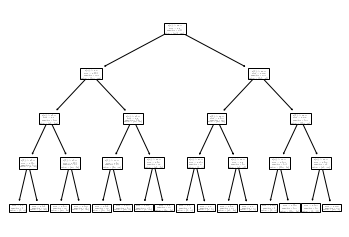

In [114]:
from sklearn import tree
tree.plot_tree(clf)

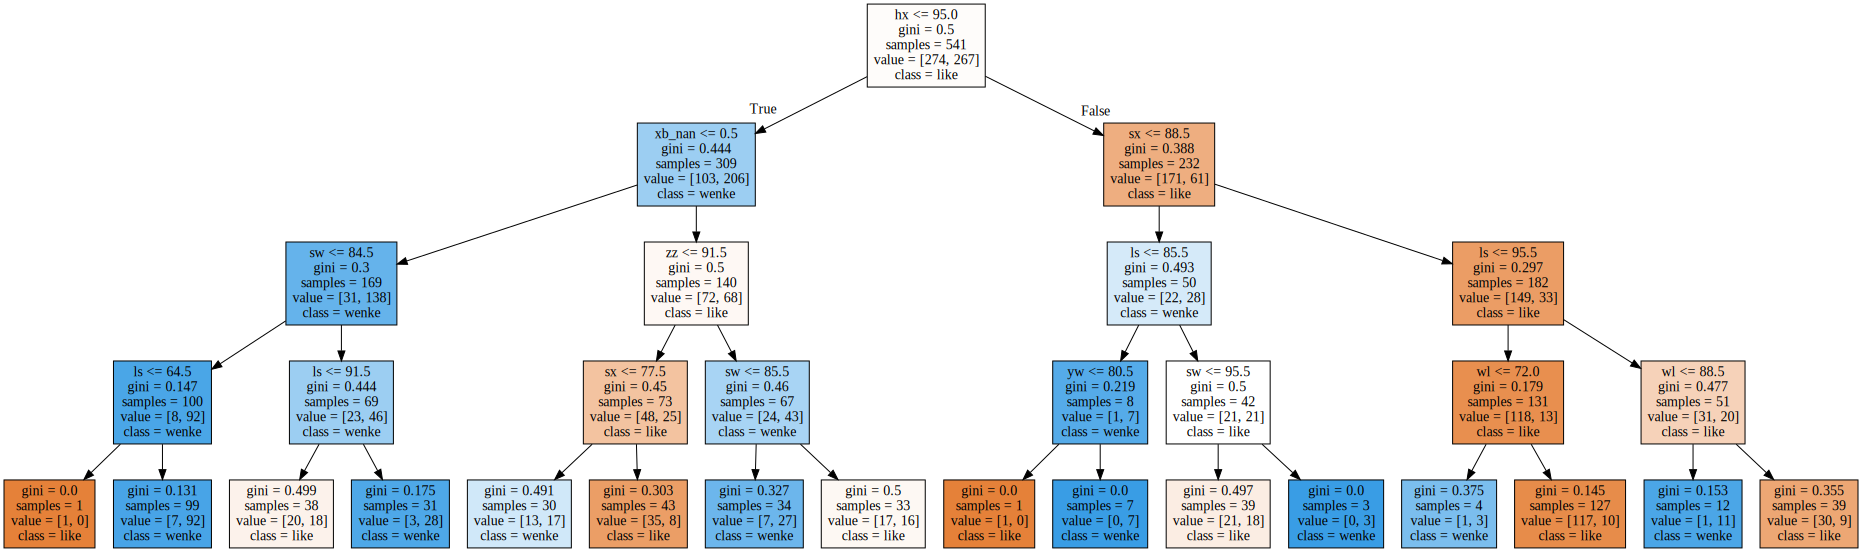

In [115]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf,
                                feature_names=X_train.columns.values,
                                class_names=['like', 'wenke'],
                                filled=True)  
graph = graphviz.Source(dot_data)  
graph 

## ÈöèÊú∫Ê£ÆÊûó

‰∏ÄÊ£µÂÜ≥Á≠ñÊ†ëÂèØ‰ª•Â≠¶Âà∞ÂæàÂ§çÊùÇÁöÑËßÑÂàô„ÄÇÁÑ∂ËÄåÔºåÂæàÂèØËÉΩ‰ºöÂØºËá¥ËøáÊãüÂêàÈóÆÈ¢ò‚Äî‚ÄîÂ≠¶Âà∞ÁöÑËßÑÂàôÂè™ÈÄÇÁî®‰∫éËÆ≠ÁªÉÈõÜ„ÄÇËß£ÂÜ≥ÊñπÊ≥ï‰πã‰∏ÄÂ∞±ÊòØË∞ÉÊï¥ÂÜ≥Á≠ñÊ†ëÁÆóÊ≥ïÔºåÈôêÂà∂ÂÆÉÊâÄÂ≠¶Âà∞ÁöÑËßÑÂàôÁöÑÊï∞Èáè„ÄÇ‰æãÂ¶ÇÔºåÊääÂÜ≥Á≠ñÊ†ëÁöÑÊ∑±Â∫¶ÈôêÂà∂Âú®‰∏âÂ±ÇÔºåÂè™ËÆ©ÂÆÉÂ≠¶‰π†‰ªéÂÖ®Â±ÄËßíÂ∫¶ÊãÜÂàÜÊï∞ÊçÆÈõÜÁöÑÊúÄ‰Ω≥ËßÑÂàôÔºå‰∏çËÆ©ÂÆÉÂ≠¶‰π†ÈÄÇÁî®Èù¢ÂæàÁ™ÑÁöÑÁâπÂÆöËßÑÂàôÔºåËøô‰∫õËßÑÂàô‰ºöÂ∞ÜÊï∞ÊçÆÈõÜËøõ‰∏ÄÊ≠•ÊãÜÂàÜ‰∏∫Êõ¥Âä†ÁªÜËá¥ÁöÑÁæ§ÁªÑ„ÄÇ‰ΩøÁî®ËøôÁßçÊäò‰∏≠ÊñπÊ°àÂæóÂà∞ÁöÑÂÜ≥Á≠ñÊ†ëÊ≥õÂåñËÉΩÂäõÂº∫Ôºå‰ΩÜÊï¥‰ΩìË°®Áé∞Á®çÂº±„ÄÇ  
‰∏∫‰∫ÜÂº•Ë°•‰∏äËø∞ÊñπÊ≥ïÁöÑ‰∏çË∂≥ÔºåÊàë‰ª¨ÂèØ‰ª•ÂàõÂª∫Â§öÊ£µÂÜ≥Á≠ñÊ†ëÔºåÁî®ÂÆÉ‰ª¨ÂàÜÂà´ËøõË°åÈ¢ÑÊµãÔºåÂÜçÊ†πÊçÆÂ∞ëÊï∞Êúç‰ªéÂ§öÊï∞ÁöÑÂéüÂàô‰ªéÂ§ö‰∏™È¢ÑÊµãÁªìÊûú‰∏≠ÈÄâÊã©ÊúÄÁªàÈ¢ÑÊµãÁªìÊûú„ÄÇËøôÊ≠£ÊòØÈöèÊú∫Ê£ÆÊûóÁöÑÂ∑•‰ΩúÂéüÁêÜ„ÄÇ

ËÆæÔºöÁªôÂÆö$d$‰∏™ÂÖÉÁªÑÁöÑËÆ≠ÁªÉÈõÜ$D$Ôºå‰∏∫ÁªÑÂêàÂàÜÁ±ªÂô®‰∫ßÁîü$k$Ê£µÂÜ≥Á≠ñÊ†ë
* (1)‰ΩøÁî®ÊúâÊîæÂõûÊäΩÊ†∑ÁîüÊàêËÆ≠ÁªÉÈõÜ$D_i$ÔºåÊØè‰∏™$D_i$ÈÉΩÊòØ$D$ÁöÑ‰∏Ä‰∏™Ëá™Âä©Ê†∑Êú¨ÔºåÊüê‰∫õÂÖÉÁªÑÂú®$D_i$‰∏≠Âá∫Áé∞Â§öÊ¨°ÔºåËÄåÊüê‰∫õÂÖÉÁªÑ‰∏çÂá∫Áé∞
* (2)ÊØè‰∏™Ëá™Âä©Ê†∑Êú¨ÈõÜÁîüÈïø‰∏∫ÂçïÊ£µÂàÜÁ±ªÊ†ëÔºàÈöèÊú∫ÈÄâÂèñÂàÜË£ÇÂ±ûÊÄßÈõÜÔºâÔºöËÆæ$F$ÊòØÁî®Êù•Âú®ÊØè‰∏™ËäÇÁÇπÂÜ≥ÂÆöÂàíÂàÜÁöÑÂ±ûÊÄßÊï∞ÔºåÂÖ∂‰∏≠$F$ËøúÂ∞è‰∫éÂèØÁî®Â±ûÊÄßÊï∞„ÄÇ‰∏∫ÊûÑÈÄ†ÂÜ≥Á≠ñÊ†ëÂàÜÁ±ªÂô®$M_i$ÔºåÂú®ÊØè‰∏™ËäÇÁÇπÈöèÊú∫ÈÄâÊã©$F$‰∏™Â±ûÊÄß‰Ωú‰∏∫ËØ•ËäÇÁÇπÂàíÂàÜÁöÑÂÄôÈÄâÂ±ûÊÄß„ÄÇ‰ΩøÁî®CARTÊñπÊ≥ïÂ¢ûÈïøÊ†ëÔºåÂ¢ûÈïøÂà∞ÊúÄÂ§ßËßÑÊ®°‰∏î‰∏çÂâ™Êûù
* (3) ÈááÁî®ÁÆÄÂçïÂ§öÊï∞ÊäïÁ•®Ê≥ïÂæóÂà∞ÈöèÊú∫Ê£ÆÊûóÁöÑÁªìÊûú

<img src=figtabs/ch5/random_forest.png align=left width = 60% height = 60% />

scikit-learn Â∫ì‰∏≠ÁöÑ RandomForestClassifier Â∞±ÊòØÂØπÈöèÊú∫Ê£ÆÊûóÁÆóÊ≥ïÁöÑÂÆûÁé∞ÔºåÂÆÉÊèê‰æõ‰∫Ü‰∏ÄÁ≥ªÂàóÂèÇÊï∞„ÄÇÂõ†‰∏∫ÂÆÉ‰ΩøÁî®‰∫Ü DecisionTreeClassifier ÁöÑÂ§ßÈáèÂÆû‰æãÔºåÊâÄ‰ª•ÂÆÉ‰ø©ÁöÑÂæàÂ§öÂèÇÊï∞ÊòØ‰∏ÄËá¥ÁöÑÔºåÊØîÂ¶ÇÂÜ≥Á≠ñÊ†áÂáÜÔºàÂü∫Â∞º‰∏çÁ∫ØÂ∫¶/‰ø°ÊÅØÂ¢ûÁõäÔºâ„ÄÅ max_features Âíå min_samples_split „ÄÇ
ÂΩìÁÑ∂ÔºåÈõÜÊàêËøáÁ®ãËøòÂºïÂÖ•‰∫Ü‰∏Ä‰∫õÊñ∞ÂèÇÊï∞Ôºö  
* n_estimators ÔºöÁî®Êù•ÊåáÂÆöÂàõÂª∫ÂÜ≥Á≠ñÊ†ëÁöÑÊï∞Èáè„ÄÇËØ•ÂÄºË∂äÈ´òÔºåÊâÄËä±Êó∂Èó¥Ë∂äÈïøÔºåÊ≠£Á°ÆÁéáÔºàÂèØËÉΩÔºâ‰πüË∂äÈ´ò„ÄÇ  
* oob_score ÔºöÂ¶ÇÊûúËÆæÁΩÆ‰∏∫ÁúüÔºåÊµãËØïÊó∂Â∞Ü‰∏ç‰ΩøÁî®ËÆ≠ÁªÉÊ®°ÂûãÊó∂Áî®ËøáÁöÑÊï∞ÊçÆ  
* n_jobs ÔºöÈááÁî®Âπ∂Ë°åËÆ°ÁÆóÊñπÊ≥ïËÆ≠ÁªÉÂÜ≥Á≠ñÊ†ëÊó∂ÊâÄÁî®Âà∞ÁöÑÂÜÖÊ†∏Êï∞Èáè„ÄÇ

In [116]:
clf = RandomForestClassifier(criterion='gini',
                             n_estimators=1000, 
                             random_state=rng)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 48
ÂáÜÁ°ÆÁéá(accuracy): 79.31%


## Êú¥Á¥†Ë¥ùÂè∂ÊñØ

ÂÖàÁúã‰∏Ä‰∏ãË¥ùÂè∂ÊñØÂÖ¨Âºè:<br>
$p\left( {y|{X_1},{X_2}, \cdots ,{X_n}} \right) = \frac{{p\left( {{X_1},{X_2}, \cdots ,{X_n}|y} \right)p\left( y \right)}}{{p\left( {{X_1},{X_2}, \cdots ,{X_n}} \right)}}$

ÂàÜÊØç‰∏çÂèëÊå•‰ΩúÁî®Ôºö<br>
$p\left( {y|{X_1},{X_2}, \cdots ,{X_n}} \right) = \frac{{p\left( {{X_1},{X_2}, \cdots ,{X_n}|y} \right)p\left( y \right)}}{{p\left( {{X_1},{X_2}, \cdots ,{X_n}} \right)}} \propto p\left( {{X_1},{X_2}, \cdots ,{X_n}|y} \right)p\left( y \right)$

Êú¥Á¥†‰∏ÄÁÇπÔºö<br>
$p\left( {y|{X_1},{X_2}, \cdots ,{X_n}} \right) \propto p\left( {{X_1},{X_2}, \cdots ,{X_n}|y} \right)p\left( y \right) = p\left( y \right)\prod\limits_{j = 1}^n {p\left( {{X_j}|y} \right)}$

Áî®‰∫éÂàÜÁ±ªÔºö<br>
$classify\left( {{X_1},{X_2}, \cdots ,{X_n}} \right) = \mathop {\arg \max }\limits_c p\left( {y = c} \right)\prod\limits_{j = 1}^n {p\left( {{X_j}|y = c} \right)}$

In [117]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 77
ÂáÜÁ°ÆÁéá(accuracy): 66.81%


ÂæóÂà∞È¢ÑÊµãÁöÑÊ¶ÇÁéáÂÄºÔºåËÄå‰∏çÊòØÁ±ªÂà´Êú¨Ë∫´Ôºö

In [118]:
y_test_pred_prob = clf.predict_proba(X_test)
y_test_pred_prob[-10:].round(2)

array([[0.26, 0.74],
       [0.95, 0.05],
       [0.05, 0.95],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.73, 0.27],
       [0.08, 0.92],
       [0.97, 0.03],
       [0.88, 0.12],
       [0.97, 0.03]])

## ÈÄªËæëÊñØËíÇÂõûÂΩí

Ë¶ÅÁªºÂêàÂà©Áî®Â•ΩÂ±ûÊÄß„ÄÅÁâπÂæÅ‰ø°ÊÅØÔºå‰∏Ä‰∏™ÁÆÄÂçïÁöÑÂäûÊ≥ïÊòØÊää‰ªñ‰ª¨‚ÄúÂä†‚ÄùËµ∑Êù•Ôºö  
$z = info\left( x \right) = {w_0} + {w_1}{x_1} +  \cdots  + {w_m}{x_m}$  
Êàë‰ª¨ÁöÑÁõÆÊ†áÔºö  
$info\left( x \right) \to \left[ {0,1} \right]$

‰ª§Ôºö  
$p\left( {y = 1|x} \right) = \frac{1}{{1 + {e^{ - info\left( x \right)}}}} = \frac{1}{{1 + {e^{ - z}}}} = \phi \left( z \right) \in \left[ {0,1} \right]$

Êàë‰ª¨ÂÆö‰πâ‰∫ã‰ª∂ÂèëÁîüÊØîodd ratio:$\frac{p}{{1 - p}}$„ÄÇÂÖ∂‰∏≠$p$‰∏∫Ê≠£‰∫ã‰ª∂ÂèëÁîüÁöÑÊ¶ÇÁéá„ÄÇÊ≠§Â§ÑÔºåÊ≠£‰∫ã‰ª∂Âπ∂‰∏çÊÑèÂë≥ÁùÄÂ•ΩÁöÑ‰∫ã‰ª∂ÔºåËÄåÊòØÊåáÊàë‰ª¨ÊâÄË¶ÅÈ¢ÑÊµãÁöÑ‰∫ã‰ª∂Ôºå‰ª•‰∏Ä‰∏™ÊÇ£ËÄÖÊÇ£ÊúâÊüêÁßçÁñæÁóÖÁöÑÊ¶ÇÁéá‰∏∫‰æãÔºåÊàë‰ª¨ÂèØ‰ª•Â∞ÜÊ≠£‰∫ã‰ª∂ÁöÑÁ±ªÊ†áÊ†áËÆ∞‰∏∫$yÔºù1$„ÄÇÊõ¥Ëøõ‰∏ÄÊ≠•ÔºåÊàë‰ª¨ÂèØ‰ª•ÂÆö‰πâlogitÂáΩÊï∞ÔºåÂÆÉÊòØÂá†ÁéáÊØîÁöÑÂØπÊï∞ÂáΩÊï∞Ôºàlog-oddsÔºåÂØπÊï∞Âá†ÁéáÔºâÔºö  
$logit\left( p \right) = \log \left( {\frac{p}{{1 - p}}} \right)$

$logit\left( {p\left( {y = 1|x} \right)} \right) = {w_0}{x_0} + {w_1}{x_1} +  \cdots  + {w_p}{x_p} = \sum\limits_{j = 0}^p {{w_j}{x_j}}  = {w^T}x$  
Âç≥Ôºö$\ln \left( {odd} \right) = \ln \frac{{p\left( {y = 1|x} \right)}}{{1 - p\left( {y = 1|x} \right)}} = z = info\left( x \right)$

Êàë‰ª¨ÂèØ‰ª•ÈÄöËøáÊûÅÂ§ß‰ººÁÑ∂ÂáΩÊï∞Ôºö  
$\begin{array}{l}
l\left( w \right) = \ln L\left( w \right) = \ln \left( {\prod\limits_{i = 1}^m {p{{\left( {{y_i}|{x^{(i)}}} \right)}^{{y_i}}}{{\left( {1 - p\left( {{y_i}|{x^{(i)}}} \right)} \right)}^{1 - {y_i}}}} } \right)\\
\;\;\;\;\;\;\; = \ln \left( {\prod\limits_{i = 1}^m {\phi {{\left( {{z^{(i)}}} \right)}^{{y_i}}}{{\left( {1 - \phi \left( {{z^{(i)}}} \right)} \right)}^{1 - {y_i}}}} } \right)\\
\;\;\;\;\;\;\; = \sum\limits_{i = 1}^m {\left( {{y_i}\ln \left( {\phi \left( {{z^{(i)}}} \right)} \right) + \left( {1 - {y_i}} \right)\ln \left( {1 - \phi \left( {{z^{(i)}}} \right)} \right)} \right)} 
\end{array}$

Êé®ÂØºÂæóÂá∫‰ª£‰ª∑ÂáΩÊï∞Ôºö  
$J\left( w \right) = \sum\limits_{i = 1}^m { - {y_i}\log \left( {\phi \left( {{z^{(i)}}} \right)} \right) - \left( {1 - {y_i}} \right)\log \left( {1 - \phi \left( {{z^{(i)}}} \right)} \right)}$

Ëøõ‰∏ÄÊ≠•Âú∞ÔºåÈÄöËøáÊ≠£ÂàôÂåñËß£ÂÜ≥ËøáÊãüÂêàÈóÆÈ¢òÔºö  

Ê≠£ÂàôÈ°πÔºö  
$L2:\left\| w \right\|_2^2 = \sum\limits_{j = 1}^m {w_j^2}$


$L1:{\left\| w \right\|_1} = \sum\limits_{j = 1}^m {\left| {{w_j}} \right|}$

ÂÖ∂‰∏≠ÁöÑÂèÇÊï∞$C$‰∏∫‰∫Ü‰∏éÊîØÊåÅÂêëÈáèÊú∫‰øùÊåÅ‰∏ÄËá¥ÔºåÊòØÊ≠£ÂàôÂåñÁ≥ªÊï∞ÁöÑÂÄíÊï∞Ôºö  
$C = \frac{1}{\lambda }$
ÈÄªËæëÊñØËíÇÂõûÂΩí‰∏≠ÁöÑÊ≠£ÂàôÂåñ‰ª£‰ª∑ÂáΩÊï∞ÂÜô‰ΩúÔºö  
$J\left( w \right) = C\left\{ {\sum\limits_{i = 1}^m { - {y_i}\log \left( {\phi \left( {{z^{(i)}}} \right)} \right) - \left( {1 - {y_i}} \right)\log \left( {1 - \phi \left( {{z^{(i)}}} \right)} \right)} } \right\} + \frac{1}{2}{\left\| w \right\|^2}$

In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100.0, random_state=rng)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print_performance(y_test, y_test_pred)

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 54
ÂáÜÁ°ÆÁéá(accuracy): 76.72%


ÂØπ‰∫éscikit-learn‰∏≠ÊîØÊåÅL1ÁöÑÊ≠£ÂàôÂåñÊ®°ÂûãÔºåÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáÂ∞ÜpenaltyÂèÇÊï∞ËÆæÂÆö‰∏∫‚Äòl1‚Äô,

In [120]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [121]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [122]:
print_performance(y_test, lr.predict(X_test_pca))

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 81
ÂáÜÁ°ÆÁéá(accuracy): 65.09%


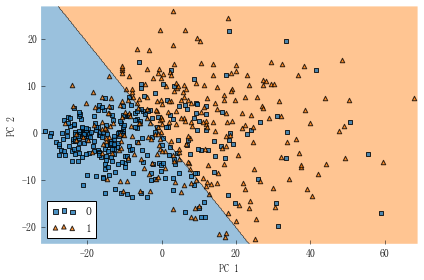

In [123]:
plot_decision_regions(X_train_pca, y_train, clf=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

## ÊîØÊåÅÂêëÈáèÊú∫

ÊîØÊåÅÂêëÈáèÊú∫È¶ñÂÖàÊ∂âÂèäÂà∞ÂàÜÁ±ªË∂ÖÂπ≥Èù¢ÁöÑÊ¶ÇÂøµ„ÄÇ‰ª•‰∏ãÂàÜÂà´ÊòØ‰∏ÄÁª¥„ÄÅ‰∫åÁª¥„ÄÅ‰∏âÁª¥Á©∫Èó¥‰∏≠ÁöÑË∂ÖÂπ≥Èù¢<br>
<img src=figtabs/ch5/svm_hyperplane.png align=left width=80% height=80% /> 

ÊòæÁÑ∂Ôºå‰ªñ‰ª¨ÈÉΩÊúâÂÖ±ÂêåÁöÑÂΩ¢ÂºèÔºö<br>
${w^T}x = 0$

Ë¶ÅÂ∞ÜÊï∞ÊçÆÁÇπÂàÜÂºÄÔºåÊúâÂæàÂ§öËøôÊ†∑ÁöÑË∂ÖÂπ≥Èù¢„ÄÇÁõ∏ÊØîËæÉËÄåË®ÄÔºå‰∏ãÂõæ‰∏≠Á∫¢Ëâ≤ÁöÑÈÉ®ÂàÜÊúâÊõ¥ÂÆΩÁöÑËæπÁºòÔºå‚ÄúÈÅìË∑Ø‚ÄùÊõ¥ÂÆΩ„ÄÅÊ≥õÂåñËÉΩÂäõÊõ¥Âº∫<br>
<img src=figtabs/ch5/svm_margin.png align=left width=30% height=30% />

Ëøô‰∏™ËæπÁºòÊÄé‰πàË°®Á§∫Âë¢Ôºö<br>
‰ª§‰∏§‰∏™Âπ≥Ë°åÁöÑËæπÁïåÂàÜÂà´‰∏∫Ôºö<br>
${w^T}x + b = 1$<br>
${w^T}x + b = -1$<br>
‰∫éÊòØÊúâÔºö<br>
$\begin{array}{l}
{w^T}\left( {{p_1} - {p_2}} \right) = 2\\
 \Rightarrow \left\| w \right\| \times d = 2\\
 \Rightarrow d = \frac{2}{{\left\| w \right\|}}
\end{array}$<br>
<img src=figtabs/ch5/svm_margin2.png align=left width=30% height=30% />

ÂÆûÁé∞Èó¥ÈöîÊúÄÂ§ßÂåñÔºåÁ≠â‰ª∑‰∫éÊúÄÂ∞èÂåñÁõÆÊ†áÂáΩÊï∞Ôºö<br>
$\mathop {\min }\limits_w \frac{{{{\left\| w \right\|}^2}}}{2}$<br>
Êª°Ë∂≥Â¶Ç‰∏ãÁ∫¶ÊùüÔºö<br>
${y_i}\left( {{w^T}x + b} \right) \ge 1$<br>
ÈÄöËøáÊãâÊ†ºÊúóÊó•Ê≥ïÊ±ÇËß£ÔºåÂæóÂà∞ÊùÉÂêëÈáèÊúÄ‰ºòËß£‰∏∫Ôºö<br>
${w^*} = \sum\limits_{i = 1}^m {\alpha _i^*{y_i}{x^{\left( i \right)}}}$<br>
Áõ∏Â∫îÁöÑÂÜ≥Á≠ñÂáΩÊï∞‰∏∫Ôºö<br>
${w^*}{x^{\left( j \right)}} + b = {\left( {\sum\limits_{i = 1}^m {\alpha _i^*{y_i}{x^{\left( i \right)}}} } \right)^T}{x^{\left( j \right)}} + b = \sum\limits_{i = 1}^m {\alpha _i^*{y_i}\left\langle {{x^{\left( i \right)}},{x^{\left( j \right)}}} \right\rangle }  + b$<br>
Áî±Ê≠§ÂèØ‰ª•ÁúãÂá∫ÔºöÂØπ‰∫éÊµãËØïÈõÜÁöÑÈ¢ÑÊµãÔºåÂè™ÈúÄË¶ÅËÆ°ÁÆóÂÆÉ‰∏éËÆ≠ÁªÉÊï∞ÊçÆÁÇπÁöÑÂÜÖÁßØÂç≥ÂèØÔºõÂáÜÁ°ÆÂú∞ËÆ≤ÔºåÊòØÂè™ÈúÄË¶ÅËÆ°ÁÆóÂÆÉÂíåÊîØÊåÅÂêëÈáèÁöÑÂÜÖÁßØÂç≥ÂèØÔºåÂõ†‰∏∫ÈùûÊîØÊåÅÂêëÈáèÁöÑ$\alpha$Âùá‰∏∫Èõ∂

<img src=figtabs/ch5/svm_softmargin.png align=left width=30% height=30% />

ÂØπÊØî‰∏äÂõæ‰∏≠ÁöÑ‰∏§‰∏™Ë∂ÖÂπ≥Èù¢„ÄÇÁ∫¢Ëâ≤ÁöÑË∂ÖÂπ≥Èù¢ÔºåÈîôÂàÜ‰∫Ü‰∏Ä‰∏™Ê†∑Êú¨ÔºåËìùËâ≤ÁöÑË∂ÖÂπ≥Èù¢ÂÆåÂÖ®Ê≠£Á°Æ„ÄÇ‰ΩÜÊòØÔºåÁ∫¢Ëâ≤ÈÅìË∑Ø‰æùÁÑ∂ÊØîËìùËâ≤ÁöÑÈÅìË∑ØÊõ¥ÂèØÂèñÔºåËΩØÈó¥Èöîsoft marginÂ≠¶‰π†ÂÖÅËÆ∏‰∏ÄÂÆöËÆ≠ÁªÉÈîôËØØÁöÑÂÜ≥Á≠ñËæπÁïå

Âú®Êï∞Â≠¶‰∏äÔºåÁõ∏ÂΩì‰∫éÊòØÂºïÂÖ•‰∫ÜÊùæÂºõÂèòÈáèÔºö<br>
$\begin{array}{l}
{w^T}{x^{(i)}} + b = 1 - {\xi _i},{y_i} = 1\\
{w^T}{x^{(i)}} + b = {\rm{ - }}1 + {\xi _i},{y_i} =  - 1
\end{array}$<br>
Áõ∏Â∫îÁöÑÁõÆÊ†áÂáΩÊï∞‰∏∫Ôºö<br>
$\frac{{{{\left\| w \right\|}^2}}}{2} + C{\left( {\sum\limits_{i = 1}^N {{\xi _i}} } \right)^k}$

‰ª•‰∏äÈÉΩÊòØÁ∫øÊÄßÂèØÂàÜÁöÑÊÉÖÂÜµÔºå‰πüÂèØËÉΩÂ≠òÂú®Â¶Ç‰∏ãÁ∫øÊÄß‰∏çÂèØËÉΩÁöÑÊÉÖÂΩ¢Ôºö<br>
<img src=figtabs/ch5/svm_nonlinear.png align=left width=50% height=50% />

ÂØπ‰∫éÈùûÁ∫øÊÄßÈóÆÈ¢òÔºåÈúÄË¶ÅÂÅöÂà∞Ôºö<br>
* Á¨¨‰∏ÄÔºåÂ∞ÜÂ±ûÊÄßÁ©∫Èó¥Êò†Â∞ÑÂà∞ÁâπÂæÅÁ©∫Èó¥Ôºõ
* Á¨¨‰∫åÔºåÂú®ÁâπÂæÅÁ©∫Èó¥‰∏≠ÈááÁî®Á∫øÊÄßÂàÜÁ±ªÂô®ËøõË°åÂàÜÁ±ª„ÄÇ<br>
<img src=figtabs/ch5/svm_nonlinear_1D.png align=left width=50% height=50% />

ÂÜ≥Á≠ñËßÑÂàô‰∏∫Ôºö<br>
$\sum\limits_{i = 1}^m {\alpha _i^*{y_i}\left\langle {\phi \left( {{x^{\left( i \right)}}} \right),{x^{\left( j \right)}}} \right\rangle }  + b$<br>
ÂÖ∂‰∏≠Ôºå$\phi$‰∏∫Â±ûÊÄßÁ©∫Èó¥Âà∞ÁâπÂæÅÁ©∫Èó¥ÁöÑÊò†Â∞ÑÔºö$\phi :{\cal X} \to {\cal F}$<br>
ÂºïÂÖ•Ê†∏ÊñπÊ≥ïÔºö<br>
‰∏ÄÂØπÂêëÈáèÁöÑÊ†∏ÂáΩÊï∞Á≠â‰∫éÂèòÊç¢ÂêéÁ©∫Èó¥‰∏≠ËÆ°ÁÆóËøôÂØπÂêëÈáèÁöÑÂÜÖÁßØÔºö$K\left( {{x^{\left( i \right)}},{x^{\left( j \right)}}} \right) = \left\langle {\phi \left( {{x^{\left( i \right)}}} \right),\phi \left( {{x^{\left( j \right)}}} \right)} \right\rangle $<br>
‰πüÂ∞±ÊòØËØ¥ÔºåÊúâ‰∫ÜÊ†∏ÂáΩÊï∞ÔºåÊàë‰ª¨ÁîöËá≥‰∏çÈúÄË¶ÅÁü•ÈÅìÂ¶Ç‰ΩïÂÖ∑‰ΩìÊò†Â∞ÑÂà∞È´òÁª¥Á©∫Èó¥

In [124]:
model = SVC(kernel='linear',
            C=1.0,
            random_state=rng)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print_performance(y_test, y_test_pred)

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 57
ÂáÜÁ°ÆÁéá(accuracy): 75.43%


In [125]:
model = SVC(kernel='rbf',  
          gamma=0.003, 
          C=1.0, 
          random_state=rng)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print_performance(y_test, y_test_pred)

ËØØÂàÜÊ†∑Êú¨Êï∞ÔºàMisclassified samplesÔºâ: 51
ÂáÜÁ°ÆÁéá(accuracy): 78.02%


## ÂèÇÊï∞Ë∞É‰ºò‚Äî‚ÄîÊ†ºÂ≠êÁÇπÊêúÁ¥¢

ÂèÇÊï∞ÁöÑËÆæÁΩÆÔºåÂΩìÁÑ∂ÂèØ‰ª•Ëá™Â∑±ÂÜôÂµåÂ•óÂæ™ÁéØÊù•ÂÆûÁé∞Ôºå‰∏çËøáÊõ¥Â•ΩÁöÑÂäûÊ≥ïÔºåÊòØÈááÁî®Ê†ºÂ≠êÁÇπÊêúÁ¥¢Ôºö

In [126]:
parameter_space = {
                   "n_estimators": [500, 1000, 1500, 2000],
                   "criterion": ["gini", "entropy"]
                   }
clf = RandomForestClassifier(random_state=rng)
grid = GridSearchCV(clf, parameter_space)
grid.fit(X_train, y_train)
print("Accuracy: {0:.2f}%".format(grid.best_score_ * 100))

Accuracy: 76.34%


In [127]:
def wts1(distance):
    return 1 / distance

def wts2(distance):
    return np.exp(-distance)

parameter_space = {
                   "n_neighbors": range(1, 30),
                   "weights": ["uniform", "distance", wts1, wts2]
                   }
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, parameter_space)
grid.fit(X_train, y_train)
print("Accuracy: {0:.2f}%".format(grid.best_score_ * 100))

Accuracy: 77.09%


ËøôÊ¨°Ê≠£Á°ÆÁéáÊèêÂçáËæÉÂ§ßÔºåËææÂà∞‰∫Ü77.27%ÔºÅ  
ËæìÂá∫Áî®ÁΩëÊ†ºÊêúÁ¥¢ÊâæÂà∞ÁöÑÊúÄ‰Ω≥Ê®°ÂûãÔºåÊü•ÁúãÈÉΩ‰ΩøÁî®‰∫ÜÂì™‰∫õÂèÇÊï∞„ÄÇ‰ª£Á†ÅÂ¶Ç‰∏ãÔºö

In [128]:
print(grid.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')


ÂèØËÉΩ‰πüÊúâÂêåÂ≠¶‰ºöÂØπËá™Âä®‰ºòÂåñÂèÇÊï∞ÊØîËæÉÊÑüÂÖ¥Ë∂£Ôºå‰πüÂ∞±ÊòØËØ¥‰∏∫ÁöÑÊú∫Âô®Â≠¶‰π†Ëá™Âä®Âåñ„ÄÇÂèØ‰ª•Ëá™Ë°åÊü•ÈòÖÁõ∏ÂÖ≥ÂÜÖÂÆπÔºåÊØîÂ¶ÇÁ†îÁ©∂‰∏Ä‰∏ãautosklearnÊ®°Âùó„ÄÇ

## KÊäò‰∫§ÂèâÊ£ÄÈ™å

KÊäò‰∫§ÂèâÊ£ÄÈ™åÁöÑÂéüÁêÜÂ¶Ç‰∏ãÔºö<br>
<img src=figtabs/ch5/k_fold.png align=center height=50% width=50% />

scikit-learn Â∫ìÂÆûÁé∞ÁöÑÈöèÊú∫Ê£ÆÊûóÁÆóÊ≥ï‰ΩøÁî®‰º∞ËÆ°Âô®Êé•Âè£ÔºåÁî®‰∫§ÂèâÊ£ÄÈ™åÊñπÊ≥ïË∞ÉÁî®ÂÆÉÂç≥ÂèØÔºå‰ª£Á†ÅË∑ü‰πãÂâçÂ§ßÂêåÂ∞èÂºÇ„ÄÇ

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=rng)
cv5 = cross_val_score(clf, X_train, y_train, cv = 5, scoring='accuracy')
cv10 = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
print("Accuracy: {0:.1f}%".format(np.mean(cv5) * 100))
print("Accuracy: {0:.1f}%".format(np.mean(cv10) * 100))

Accuracy: 75.4%
Accuracy: 76.0%


In [130]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)

In [131]:
print('3-fold cross validation: \n')

for clf, label in zip([clf1, clf2, clf3, sclf],
                      ['KNN',
                       'Random Forest',
                       'Naive Bayes',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf,
                                             X_train, y_train,
                                             cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %
          (scores.mean(), scores.std(), label))

3-fold cross validation: 

Accuracy: 0.68 (+/- 0.03) [KNN]
Accuracy: 0.74 (+/- 0.04) [Random Forest]
Accuracy: 0.72 (+/- 0.02) [Naive Bayes]
Accuracy: 0.74 (+/- 0.03) [StackingClassifier]


## Ê®°ÂûãÂ≠òÂÇ®

Êó†ËÆ∫ÊòØÊï∞ÊçÆÊ∏ÖÊ¥óÔºåËøòÊòØÂª∫Ê®°ÔºåÈÉΩË¶ÅËÄóË¥π‰∏ÄÂÆöÁöÑËøêË°åÊó∂Èó¥„ÄÇÊ∏ÖÊ¥óÂ•ΩÁöÑÊï∞ÊçÆ„ÄÅ‰ª•ÂèäÂª∫Â•ΩÁöÑÊ®°ÂûãÔºåÊàë‰ª¨Â∏åÊúõÂèØ‰ª•Áõ¥Êé•Â≠òÂÇ®Ëµ∑Êù•ÔºåÁïôÂæÖÊó•ÂêéÂÜçÁî®„ÄÇÂú®PythonÈáåËæπÔºåÈÄöÂ∏∏ÁöÑÂÅöÊ≥ïÊòØÊää‰ªñ‰ª¨‚ÄúËÖåÂà∂‚ÄùËµ∑Êù•ÔºåÈïøÊúü‰øùÂ≠òÔºåÊñπÊ≥ïÂíåÂâçËø∞pickle X_numericÁöÑÊñπÊ≥ï‰∏ÄÊ†∑„ÄÇÊ≠§Â§ñÔºåjoblib‰πüÊòØÂ∏∏Áî®ÁöÑ‰∏Ä‰∏™Ê®°ÂûãÊåÅ‰πÖÂåñÁöÑÂåÖÔºåÂèØ‰ª•Êñπ‰æøÂú∞ÊääÊ®°ÂûãÂ≠òÂà∞Á£ÅÁõò‰∏ä„ÄÇ

## ÂèòÈáèÈáçË¶ÅÊÄß

[ÂèòÈáèÈáçË¶ÅÊÄßËÆ°ÁÆóÊñπÊ≥ï](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#overview)Â¶Ç‰∏ãÔºö<br>
* **Variable importance**<br>
> In every tree grown in the forest, put down the oob cases and count the number of votes cast for the correct class. Now randomly permute the values of variable m in the oob cases and put these cases down the tree. Subtract the number of votes for the correct class in the variable-m-permuted oob data from the number of votes for the correct class in the untouched oob data. The average of this number over all trees in the forest is the raw importance score for variable m.<br>
* **Gini importance**<br>
> Every time a split of a node is made on variable m the gini impurity criterion for the two descendent nodes is less than the parent node. Adding up the gini decreases for each individual variable over all trees in the forest gives a fast variable importance that is often very consistent with the permutation importance measure.

Âú®sklearn‰∏≠ÁöÑÂÆûÁé∞Ôºö<br>
> The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features. In scikit-learn, the fraction of samples a feature contributes to is combined with the decrease in impurity from splitting them to create a normalized estimate of the predictive power of that feature.

In [132]:
feat_labels = X_train.columns
model = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)

In [133]:
model.fit(X_train, y_train)
importances = model.feature_importances_

In [134]:
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) wl                             0.143392
 2) sx                             0.142425
 3) sw                             0.139374
 4) hx                             0.122857
 5) ls                             0.109095
 6) zz                             0.080025
 7) wy                             0.074196
 8) yw                             0.065703
 9) dl                             0.057798
10) xb_nan                         0.033102
11) xb_nv                          0.032032


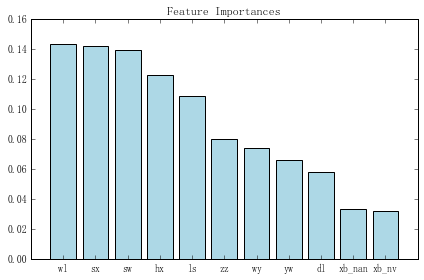

In [135]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices])
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## ‰∏çÂêåÂàÜÁ±ªÂô®ÂÜ≥Á≠ñËæπÁïåÊØîËæÉÔºà‰ªÖÂèñ2‰∏™ÁâπÂæÅÔºâ

In [136]:
# Initializing Classifiers
clf1 = LogisticRegression(random_state=rng)
clf2 = RandomForestClassifier(random_state=rng)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

In [137]:
list(itertools.product([0, 1], repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

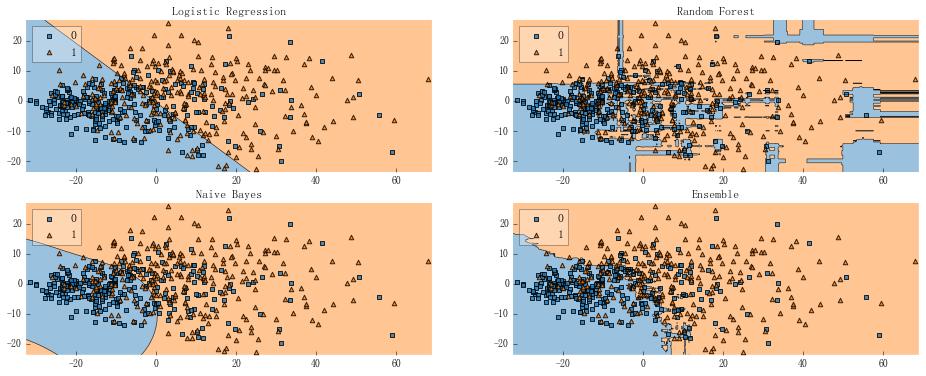

In [138]:
# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(16, 6))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_pca, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_pca, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

## ‰∏çÂêåÂàÜÁ±ªÂô®ÂÜ≥Á≠ñËæπÁïåÊØîËæÉÔºàÂèñÂ§ö‰∏™ÁâπÂæÅÔºâ

In [139]:
from sklearn.decomposition import PCA

In [140]:
def get_pca(X):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_pca = pd.DataFrame(X_pca)
    X_pca.columns = ['pc1', 'pc2']
    return X_pca

In [141]:
def get_data_frame_cartesian_product(df):
    dicts = df.to_dict(orient='list')
    new_list = [list(x) for x in itertools.product(*dicts.values())]
    new_df = pd.DataFrame(new_list, columns=df.columns)
    return new_df

In [142]:
test_df = pd.DataFrame({
    'x1':range(1, 4),
    'x2':['a', 'b', 'c']
})
test_df.to_dict(orient='list').values()

dict_values([[1, 2, 3], ['a', 'b', 'c']])

In [143]:
#get_data_frame_cartesian_product(test_df)
[list(x) for x in itertools.product([1, 2, 3], ['a', 'b', 'c'])] 

[[1, 'a'],
 [1, 'b'],
 [1, 'c'],
 [2, 'a'],
 [2, 'b'],
 [2, 'c'],
 [3, 'a'],
 [3, 'b'],
 [3, 'c']]

In [144]:
def plot_decision_regions2(X, y, clf, cp_flag=False, predict_proba = False):
    
    X = pd.DataFrame(X)

    if cp_flag:
        #Ê†πÊçÆÊúÄÂ§ßÂÄº„ÄÅÊúÄÂ∞èÂÄºÁîüÊàêÁ≠âË∑ùÊ†ÖÊ†º
        fill_ratio = 5 #ÊúÄÂ§ß‰∏çË¶ÅË∂ÖËøá5
        col = 0
        col_min = np.min(X.iloc[:, col])
        col_max = np.max(X.iloc[:, col])
        X_simulation = [np.linspace(col_min, col_max, fill_ratio)]
        for col in X.columns[1:]:
            col_min = np.min(X.loc[:, col])
            col_max = np.max(X.loc[:, col])
            X_simulation.append(np.linspace(col_min, col_max, fill_ratio))
        X_simulation = pd.DataFrame(X_simulation).T
        X_simulation.columns = X.columns

        #ÁîüÊàêÁ¨õÂç°Â∞îÁßØDataFrame
        X_simulation_cartesian_product = get_data_frame_cartesian_product(X_simulation)

        X_train = pd.concat([X, X_simulation_cartesian_product], axis=0)
    else:
        X_train = X
    #Âú®Á¨õÂç°Â∞îÊï∞ÊçÆÊ°Ü‰∏äËøõË°åÈ¢ÑÊµã
    y_train_pred = clf.predict(X_train)
    
    #Á¨õÂç°Â∞îÊï∞ÊçÆÊ°ÜÁöÑ‰∏ªÊàêÂàÜ
    X_train_pca = get_pca(X_train) 
    
    #ÂéüÂßãÊï∞ÊçÆÁöÑ‰∏ªÊàêÂàÜ
    X_pca = get_pca(X.values) 
    
    #‰∏ªÊàêÂàÜÁΩëÊ†ºÂùêÊ†á
    x_min = np.min(X_pca.loc[:, 'pc1'])
    x_max = np.max(X_pca.loc[:, 'pc1'])
    y_min = np.min(X_pca.loc[:, 'pc2'])
    y_max = np.max(X_pca.loc[:, 'pc2'])
    xnum = 50
    ynum = 50
    dim = 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=xnum),
                         np.linspace(y_min, y_max, num=ynum))
    X_pca_grid = np.array([xx.ravel(), yy.ravel()]).T
    X_test = np.zeros((X_pca_grid.shape[0], dim))
    X_test[:, 0] = X_pca_grid[:, 0]
    X_test[:, 1] = X_pca_grid[:, 1]
    
    #‰∏ªÊàêÂàÜÁΩëÊ†ºÁõ∏Â∫îÁöÑÈ¢ÑÊµãÂÄº‚Äî‚ÄîÊúÄËøëÈÇªÊ≥ï
    model = KNeighborsClassifier(n_neighbors=1, weights='uniform')
    model.fit(X_train_pca, y_train_pred)
    if predict_proba:
        y_test_pred = model.predict_proba(X_test)
        y_test_pred = pd.DataFrame(y_test_pred).iloc[:, 1].values
    else:
        y_test_pred = model.predict(X_test)

    Z = y_test_pred.reshape(xx.shape)
    
    #ÁªòÂà∂ÂÜ≥Á≠ñËæπÁïå
    markers = 's^oxv<>'
    colors = ('#1f77b4,#ff7f0e,#3ca02c,#d62728,'
          '#9467bd,#8c564b,#e377c2,'
          '#7f7f7f,#bcbd22,#17becf')
    scatter_kwargs = None
    contourf_kwargs = None
    scatter_highlight_kwargs = None

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(',')
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]
    #colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    ax = plt.gca()
    contourf_kwargs_default = {'alpha': 0.45, 'antialiased': True}
    cset = ax.contourf(xx, yy, Z,
                   colors=colors,
                   levels=np.arange(Z.max() + 2) - 0.5)

    ax.contour(xx, yy, Z, cset.levels,
           colors='k',
           linewidths=0.5,
           antialiased=True)

    ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
    x_index, y_index = 0, 1
    scatter_kwargs_default = {'alpha': 0.8, 'edgecolor': 'black'}
    scatter_kwargs = format_kwarg_dictionaries(
       default_kwargs=scatter_kwargs_default,
       user_kwargs=scatter_kwargs,
       protected_keys=['c', 'marker', 'label'])
    for idx, c in enumerate(np.unique(y)):
        y_data = X_pca[y == c].iloc[:, y_index]
        x_data = X_pca[y == c].iloc[:, x_index]
        ax.scatter(x=x_data,
               y=y_data,
               c=colors[idx],
               marker=next(marker_gen),
               label=c,
               **scatter_kwargs)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Êàë‰ª¨ÂÖàÈÄöËøáListedColormapÊñπÊ≥ïÂÆö‰πâ‰∏Ä‰∫õÈ¢úËâ≤ÔºàcolorÔºâÂíåÊ†áËÆ∞Á¨¶Âè∑ÔºàmarkerÔºâÔºåÂπ∂ÈÄöËøáÈ¢úËâ≤ÂàóË°®ÁîüÊàê‰∫ÜÈ¢úËâ≤Á§∫‰æãÂõæ„ÄÇÁÑ∂ÂêéÂØπ‰∏§‰∏™ÁâπÂæÅÁöÑÊúÄÂ§ßÂÄº„ÄÅÊúÄÂ∞èÂÄºÂÅö‰∫ÜÈôêÂÆöÔºå‰ΩøÁî®NumPyÁöÑmeshgridÂáΩÊï∞Â∞ÜÊúÄÂ§ßÂÄº„ÄÅÊúÄÂ∞èÂÄºÂêëÈáèÁîüÊàê‰∫åÁª¥Êï∞ÁªÑxx1Âíåxx2„ÄÇÁî±‰∫é‰ΩøÁî®‰∫Ü‰∏§‰∏™ÁâπÂæÅÊù•ËÆ≠ÁªÉÊÑüÁü•Âô®ÔºåÂõ†Ê≠§ÈúÄË¶ÅÂ∞Ü‰∫åÁª¥ÁªÑÂ±ïÂºÄÔºåÂàõÂª∫‰∏Ä‰∏™‰∏éÈ∏¢Â∞æËä±Êï∞ÊçÆËÆ≠ÁªÉÊï∞ÊçÆÈõÜ‰∏≠ÂàóÊï∞Áõ∏ÂêåÁöÑÁü©ÈòµÔºå‰ª•È¢ÑÊµãÂ§öÁª¥Êï∞ÁªÑ‰∏≠ÊâÄÊúâÂØπÂ∫îÁÇπÁöÑÁ±ªÊ†áz„ÄÇÂ∞ÜzÂèòÊç¢‰∏∫‰∏éxx1Âíåxx2Áõ∏ÂêåÁöÑÁª¥Â∫¶ÂêéÔºåÊàë‰ª¨Â∞±ÂèØ‰ª•‰ΩøÁî®matplotlib‰∏≠ÁöÑcontourfÂáΩÊï∞ÔºåÂØπ‰∫éÁΩëÊ†ºÊï∞ÁªÑ‰∏≠ÊØè‰∏™È¢ÑÊµãÁöÑÁ±ª‰ª•‰∏çÂêåÁöÑÈ¢úËâ≤ÁªòÂà∂Âá∫È¢ÑÊµãÂæóÂà∞ÁöÑÂÜ≥Á≠ñÂå∫Âüü„ÄÇ

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.tree import DecisionTreeClassifier

In [146]:
# Initializing Classifiers
clf1 = GaussianNB()
clf2 = LogisticRegression(C=100.0, random_state=rng)
clf3 = SVC(kernel='linear', C=1.0, random_state=rng, probability=True)
clf4 = KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski')
clf5 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
clf6 = RandomForestClassifier(criterion='gini',
                                n_estimators=5000, 
                                random_state=rng,
                                n_jobs=2)

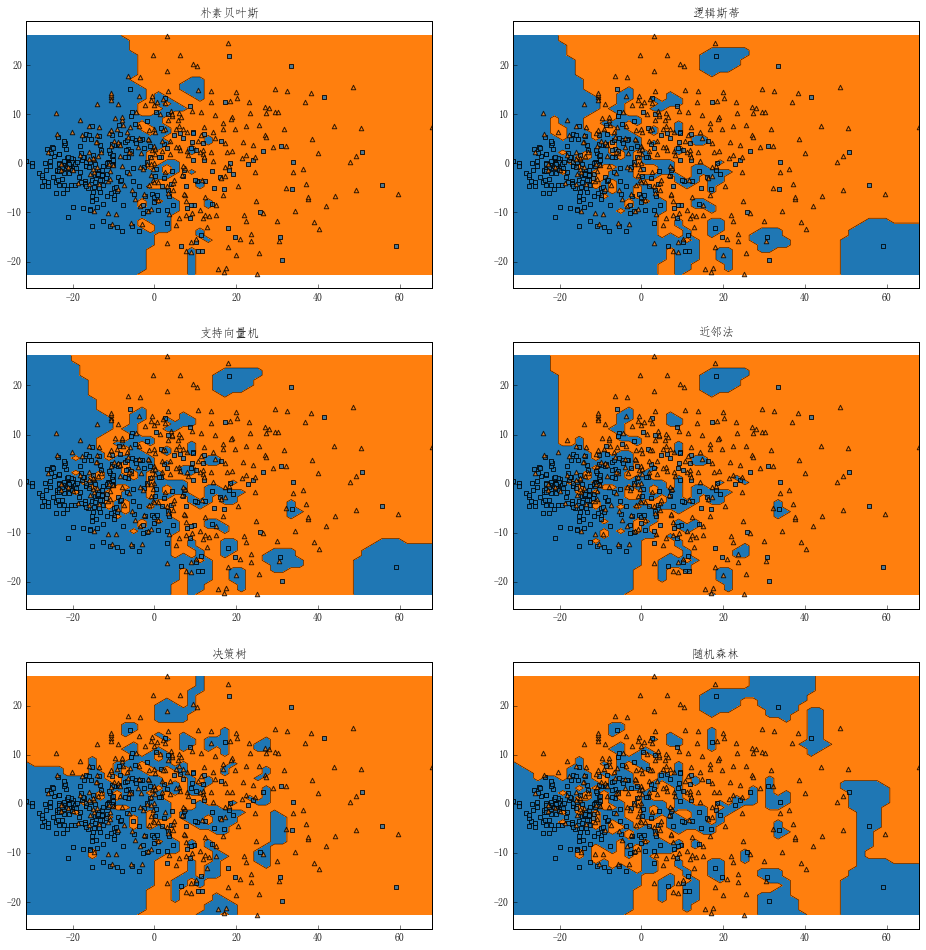

In [147]:
# Plotting Decision Regions
gs = gridspec.GridSpec(4, 2)
fig = plt.figure(figsize=(16, 22))

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         ['Êú¥Á¥†Ë¥ùÂè∂ÊñØ', 'ÈÄªËæëÊñØËíÇ', 'ÊîØÊåÅÂêëÈáèÊú∫', 'ËøëÈÇªÊ≥ï', 'ÂÜ≥Á≠ñÊ†ë', 'ÈöèÊú∫Ê£ÆÊûó'],
                         itertools.product([0, 1, 2], [0, 1])):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions2(X=X_train.values, y=y_train, 
                                clf=clf)
    plt.title(lab)
plt.show()

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.tree import DecisionTreeClassifier

In [149]:
# Initializing Classifiers
ks = [2, 5, 10, 20, 50, 100, 300,  540]
clf_names = ['clf'+str(idx) for idx in range(len(ks))]

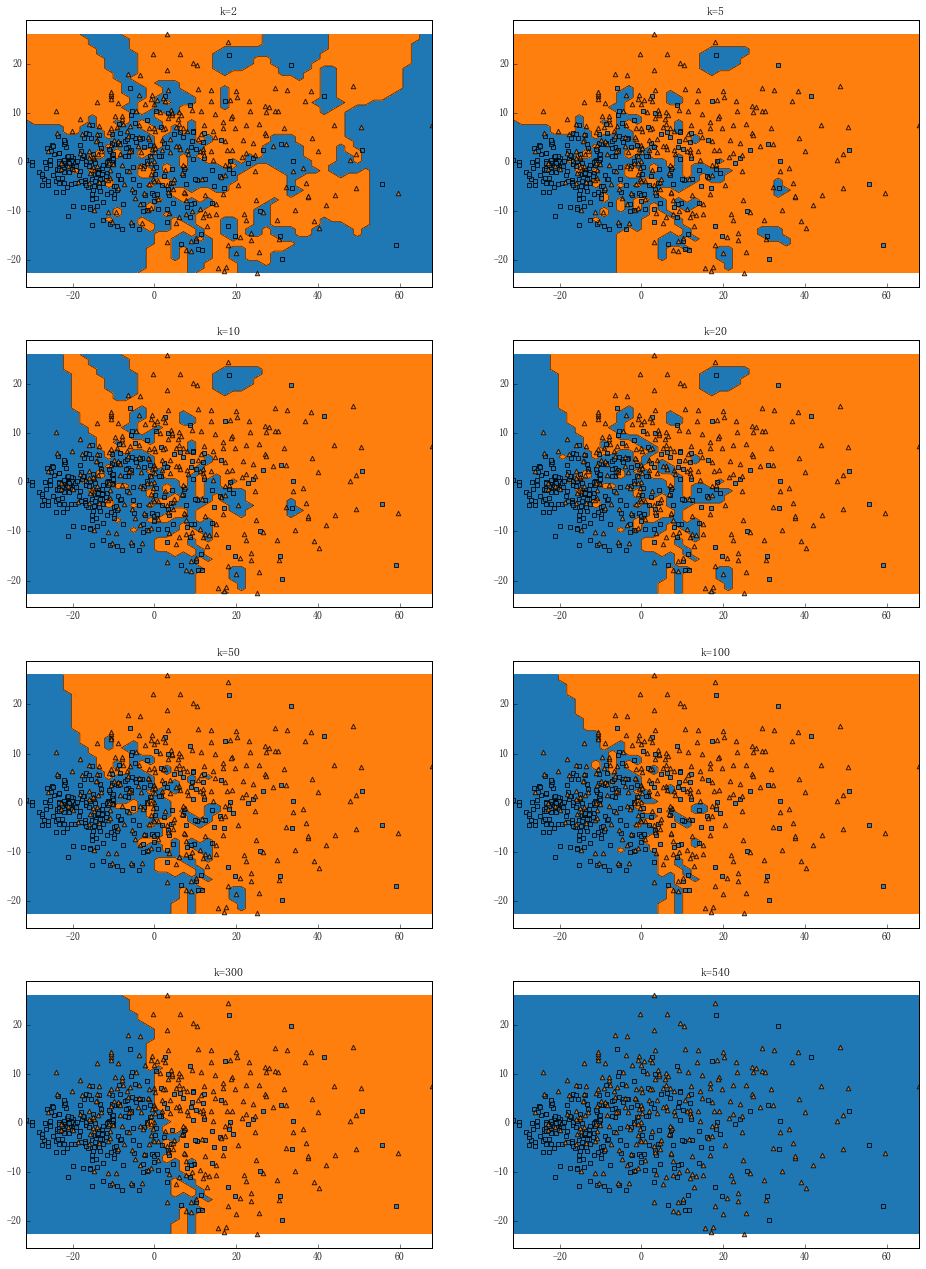

In [150]:
createVar = locals() #Ê≥®ÊÑèÔºåÊ≠§Â§ÑÁî®Âà∞‰∫ÜÂä®ÊÄÅÁîüÊàêÂèòÈáèÁöÑÊäÄÂ∑ßclf0~clf7ÔºåÂê¶ÂàôÂ∞±ÂæóÊääËØ≠Âè•ÈáçÂ§çÂÜô7ÈÅç‰∫Ü
for idx, val in enumerate(ks):
    createVar['clf'+str(idx)] = KNeighborsClassifier(n_neighbors=val, 
                           p=2, 
                           metric='minkowski')
clf_names = ['clf'+str(idx) for idx in range(len(ks))]
# Plotting Decision Regions
gs = gridspec.GridSpec(4, 2)
fig = plt.figure(figsize=(16, 22))

for clf, lab, grd in zip([eval(clf_name) for clf_name in clf_names],
                         ['k='+str(k) for k in ks],
                         itertools.product([0, 1, 2, 3], [0, 1])):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions2(X=X_train.values, y=y_train, 
                                clf=clf)
    plt.title(lab)
plt.show()

# ËÆ®ËÆ∫

Ëã•Â∞ÜÊú¨ÂÆûÈ™åÁöÑÈóÆÈ¢òÊÉÖÂ¢ÉËΩ¨Êç¢ÊàêÂÖ≥ËÅîÂÖ≥Á≥ªÁöÑÂèëÁé∞ÔºåÊòØÂê¶ÂèØË°åÔºüÊúâ‰ΩïÂºÇÂêåÔºü